In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression

In [2]:
b  = pd.read_csv("C:/Users/Tejal/Desktop/AS6 - LR/bank-full (3).csv",delimiter =';')

In [3]:
b

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
b.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


###EDA 

In [5]:
b['job'] = b['job'].astype('category')

In [6]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  object  
 3   education  45211 non-null  object  
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  object  
dtypes: category(1), int64(7), object(9)
memory usage: 5.6+ MB


In [7]:
b['marital']=b['marital'].astype('category')
b['education']=b['education'].astype('category')
b['default']=b['default'].astype('category')
b['housing']=b['housing'].astype('category')
b['loan']=b['loan'].astype('category')
b['contact']=b['contact'].astype('category')

In [8]:
b['poutcome']=b['poutcome'].astype('category')
b['y']=b['y'].astype('category')
b['month']=b['month'].astype('category')


In [9]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [10]:
b

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
b['job'] = b['job'].replace('unknown',0)

In [12]:
b['education'] = b['education'].replace('unknown',0)

In [13]:
b['contact'] = b['contact'].replace('unknown',0)

In [14]:
b['poutcome'] = b['poutcome'].replace('unknown',0)

In [15]:
def fn(y):
    b[y]=b[y].replace('blue-collar',1)
    b[y]=b[y].replace('management',2)
    b[y]=b[y].replace('technician',3)
    b[y]=b[y].replace('admin.',4)
    b[y]=b[y].replace('services',5)
    b[y]=b[y].replace('retired',6)
    b[y]=b[y].replace('self-employed',7)
    b[y]=b[y].replace('entrepreneur',8)
    b[y]=b[y].replace('unemployed',9)
    b[y]=b[y].replace('housemaid',10)
    b[y]=b[y].replace('student',11)


In [16]:
fn('job')

In [17]:
b.job.value_counts()

1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: job, dtype: int64

In [18]:
b.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
b['marital'] = b['marital'].replace('married',1)
b['marital'] = b['marital'].replace('single',2)
b['marital'] = b['marital'].replace('divorced',3)



In [20]:
b.marital.value_counts()

1    27214
2    12790
3     5207
Name: marital, dtype: int64

In [21]:
b.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
0             1857
Name: education, dtype: int64

In [22]:
def fn(j):
    b[j]=b[j].replace('secondary',1)
    b[j]=b[j].replace('primary',3)
    b[j]=b[j].replace('tertiary',2)

In [23]:
fn('education')

In [24]:
b.education.value_counts()

1    23202
2    13301
3     6851
0     1857
Name: education, dtype: int64

In [25]:
b.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [26]:
def fn(k):
    b[k]=b[k].replace('no',1)
    b[k]=b[k].replace('yes',2)


In [27]:
fn('default')

In [28]:
b.default.value_counts()

1    44396
2      815
Name: default, dtype: int64

In [29]:
b.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [30]:
def fn(h):
    b[h]=b[h].replace('no',1)
    b[h]=b[h].replace('yes',2)
  

In [31]:
fn('housing')

In [32]:
b.housing.value_counts()

2    25130
1    20081
Name: housing, dtype: int64

In [33]:
b.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [34]:
def fn(l):
    b[l]=b[l].replace('no',1)
    b[l]=b[l].replace('yes',2)
    

In [35]:
fn('loan')

In [36]:
b.loan.value_counts()

1    37967
2     7244
Name: loan, dtype: int64

In [37]:
b.contact.value_counts()

cellular     29285
0            13020
telephone     2906
Name: contact, dtype: int64

In [38]:
b['contact']=b['contact'].replace('cellular',1)
b['contact']=b['contact'].replace('telephone',2)

In [39]:
b.contact.value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

In [40]:
b.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [41]:
def fn(o):
    b[o]=b[o].replace('jan',1)
    b[o]=b[o].replace('feb',2)
    b[o]=b[o].replace('mar',3)
    b[o]=b[o].replace('apr',4)
    b[o]=b[o].replace('may',5)
    b[o]=b[o].replace('jun',6)
    b[o]=b[o].replace('jul',7)
    b[o]=b[o].replace('aug',8)
    b[o]=b[o].replace('sep',9)
    b[o]=b[o].replace('oct',10)
    b[o]=b[o].replace('nov',11)
    b[o]=b[o].replace('dec',12)


In [42]:
fn('month')

In [43]:
b.month.value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [44]:
b.poutcome.value_counts()


0          36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [45]:
def fn(p):
    b[p]=b[p].replace('failure',1)
    b[p]=b[p].replace('success',2)
    b[p]=b[p].replace('other',3)


In [46]:
fn("poutcome")

In [47]:
b.poutcome.value_counts()

0    36959
1     4901
3     1840
2     1511
Name: poutcome, dtype: int64

In [48]:
b.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [49]:
def fn(q):
    b[q]=b[q].replace('no',0)
    b[q]=b[q].replace('yes',1)


In [50]:
fn("y")

In [51]:
b.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [52]:
b['job']=pd.to_numeric(b['job'],errors='coerce')
b['marital']=pd.to_numeric(b['marital'],errors='coerce')
b['education']=pd.to_numeric(b['education'],errors='coerce')
b['default']=pd.to_numeric(b['default'],errors='coerce')
b['housing']=pd.to_numeric(b['housing'],errors='coerce')
b['loan']=pd.to_numeric(b['loan'],errors='coerce')
b['month']=pd.to_numeric(b['month'],errors='coerce')
b['poutcome']=pd.to_numeric(b['poutcome'],errors='coerce')
b['y']=pd.to_numeric(b['y'],errors='coerce')
b['contact']=pd.to_numeric(b['contact'],errors='coerce')


In [53]:
b

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,2,1,2143,2,1,0,5,5,261,1,-1,0,0,0
1,44,3,2,1,1,29,2,1,0,5,5,151,1,-1,0,0,0
2,33,8,1,1,1,2,2,2,0,5,5,76,1,-1,0,0,0
3,47,1,1,0,1,1506,2,1,0,5,5,92,1,-1,0,0,0
4,33,0,2,0,1,1,1,1,0,5,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,1,825,1,1,1,17,11,977,3,-1,0,0,1
45207,71,6,3,3,1,1729,1,1,1,17,11,456,2,-1,0,0,1
45208,72,6,1,1,1,5715,1,1,1,17,11,1127,5,184,3,2,1
45209,57,1,1,1,1,668,1,1,2,17,11,508,4,-1,0,0,0


In [54]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [55]:
x = b.drop("y",axis = 1)

In [56]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,2,1,2,1,2143,2,1,0,5,5,261,1,-1,0,0
1,44,3,2,1,1,29,2,1,0,5,5,151,1,-1,0,0
2,33,8,1,1,1,2,2,2,0,5,5,76,1,-1,0,0
3,47,1,1,0,1,1506,2,1,0,5,5,92,1,-1,0,0
4,33,0,2,0,1,1,1,1,0,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,1,825,1,1,1,17,11,977,3,-1,0,0
45207,71,6,3,3,1,1729,1,1,1,17,11,456,2,-1,0,0
45208,72,6,1,1,1,5715,1,1,1,17,11,1127,5,184,3,2
45209,57,1,1,1,1,668,1,1,2,17,11,508,4,-1,0,0


In [57]:
y = b['y']

In [58]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


In [61]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
27338,38,3,1,1,1,1,2,1,1,21,11,57,5,199,1,2
17822,43,8,2,2,1,744,1,2,1,29,7,619,4,-1,0,0
24367,58,2,1,2,1,-565,2,2,1,17,11,191,2,-1,0,0
21669,34,3,2,2,1,82,1,1,1,19,8,292,4,-1,0,0
7840,25,1,2,1,1,352,2,1,0,30,5,156,5,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26231,44,4,2,1,1,11,2,1,1,20,11,530,1,-1,0,0
16522,59,5,1,1,1,204,1,1,1,23,7,286,2,-1,0,0
13752,30,4,1,1,1,-68,2,1,1,10,7,327,1,-1,0,0
33352,35,2,1,2,1,2123,2,1,1,20,4,54,1,273,3,1


In [62]:
x_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5176,53,1,1,1,1,1023,2,1,0,21,5,150,3,-1,0,0
44039,32,11,2,2,1,64,1,1,1,30,6,598,4,105,5,1
16743,30,2,1,2,1,14,1,1,1,24,7,90,2,-1,0,0
18372,41,2,1,0,1,944,1,1,1,31,7,81,2,-1,0,0
19449,38,3,1,1,1,1097,1,2,1,7,8,186,3,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,49,3,1,3,1,230,2,1,0,8,5,96,1,-1,0,0
31761,35,1,1,1,1,0,2,2,1,8,4,519,1,-1,0,0
38593,56,3,2,1,1,751,2,1,1,15,5,43,8,177,5,1
42052,32,9,2,2,1,685,2,1,1,29,10,262,1,204,1,3


In [63]:
y_train


27338    0
17822    0
24367    0
21669    0
7840     0
        ..
26231    0
16522    0
13752    0
33352    0
44092    1
Name: y, Length: 31647, dtype: int64

In [64]:
y_test

5176     0
44039    1
16743    0
18372    0
19449    0
        ..
1334     0
31761    0
38593    0
42052    0
41266    0
Name: y, Length: 13564, dtype: int64

In [65]:
model = LogisticRegression()


In [66]:
model.fit(x_train,y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
prediction = model.predict(x)

In [68]:
prediction

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [69]:
prediction
len(prediction)

45211

In [70]:
prediction1 = model.predict(x_test)

In [71]:
prediction1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
len(prediction1)

13564

In [73]:
len(b)

45211

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cf = confusion_matrix(y,prediction)

In [76]:
cf

array([[39246,   676],
       [ 4461,   828]], dtype=int64)

In [77]:
model.score(x_train,y_train)

0.8864979302935507

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y,prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.16      0.24      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [80]:
from sklearn.metrics import roc_curve

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
import matplotlib.pyplot as plt

In [84]:
pre = model.predict(x)

In [86]:
fpr,tpr,thresholds = roc_curve(y,model.predict_proba(x)[:,1])

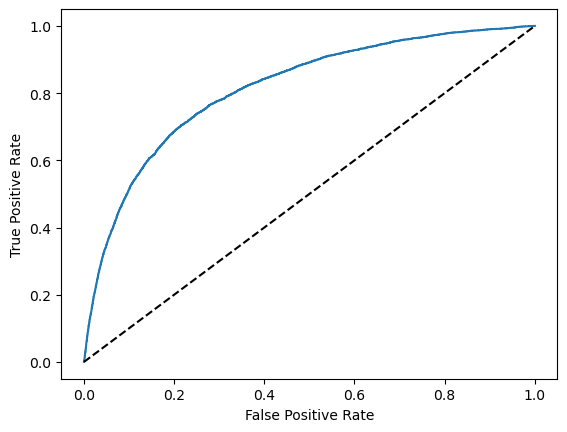

NameError: name 'auc' is not defined

In [87]:
plt.plot(fpr,tpr,label = 'LogisticRegression(area = 0.03f)')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('auc',np.round(auc,6))